# Electric Vehicle Data Analysis Project

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [36]:
data=pd.read_excel("FEV_data.xlsx")

In [37]:
df_filled=data.copy() ## This creates a copy of the original dataframe.

df_filled["Type of brakes"]=df_filled["Type of brakes"].fillna("no data")                            ## Fillna() is used to handle the missing values                                                                                                   
df_filled["Permissable gross weight [kg]"]=df_filled["Permissable gross weight [kg]"].fillna(0.0)
df_filled["Maximum load capacity [kg]"]=df_filled["Maximum load capacity [kg]"].fillna(0.0)
df_filled["Boot capacity (VDA) [l]"]=df_filled["Boot capacity (VDA) [l]"].fillna(0.0)
df_filled["Acceleration 0-100 kph [s]"]=df_filled["Acceleration 0-100 kph [s]"].fillna(0.0)
df_filled["mean - Energy consumption [kWh/100 km]"]=df_filled["mean - Energy consumption [kWh/100 km]"].fillna(0.0)


In [38]:
## Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km.
 ## (a) Your task is to filter out EVs that meet these criteria.
Budget=df_filled["Minimal price (gross) [PLN]"]<=350000
Range=df_filled["Range (WLTP) [km]"]>=400

customer=Budget & Range    ## assigning both the criteria

Evs=df_filled.loc[customer,["Make","Minimal price (gross) [PLN]","Range (WLTP) [km]","Battery capacity [kWh]"]] ## Creating filtered table
Evs.reset_index()


## Findings: -
# i) Audi provides the most Battery capacity in this criteria.
# ii) Volkswagen is the most-budget friendly in this list.
# iii) Tesla gives the maximum range satisfying customer needs.

index           Make  Minimal price (gross) [PLN]  Range (WLTP) [km]  \
0       0           Audi                       345700                438   
1       8            BMW                       282900                460   
2      15        Hyundai                       178400                449   
3      18            Kia                       167990                455   
4      20            Kia                       160990                452   
5      22  Mercedes-Benz                       334700                414   
6      39          Tesla                       195490                430   
7      40          Tesla                       235490                580   
8      41          Tesla                       260490                567   
9      47     Volkswagen                       155890                425   
10     48     Volkswagen                       179990                549   
11     49     Volkswagen                       202390                500   

    Battery capacity [kWh]  
0                     95.0  
1                     80.0  
2                     64.0  
3                     64.0  
4                     64.0  
5                     80.0  
6                     54.0  
7                     75.0  
8                     75.0  
9                     58.0  
10                    77.0  
11                    77.0

In [39]:
# Task 1
 ## b) Group them by the manufacturer.
 ## c) Calculate the average battery capacity for each manufacturer. 

Grouped_data=Evs.groupby("Make")["Battery capacity [kWh]"].mean().sort_values(ascending=False) ## Grouping "Make" column with aggregation - Average
Grouped_data.reset_index()

## Findings:
# i) Audi has the most average battery capacity.
# ii) Kia gives the lowest battery capacity.


Make  Battery capacity [kWh]
0           Audi               95.000000
1            BMW               80.000000
2  Mercedes-Benz               80.000000
3     Volkswagen               70.666667
4          Tesla               68.000000
5        Hyundai               64.000000
6            Kia               64.000000

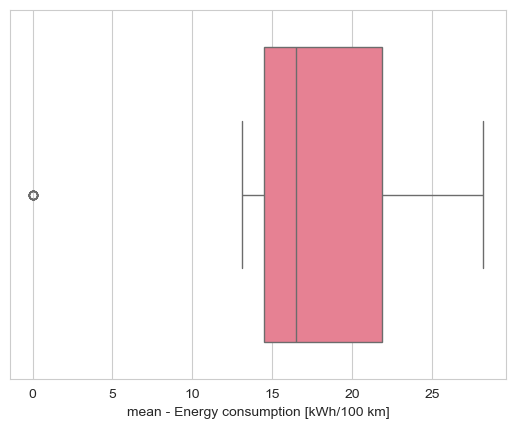

In [53]:
## Task 2 You suspect some EVs have unusually high or low energy consumption. Find the
 ## outliers in the mean- Energy consumption [kWh/100 km] column.

avg_mean_energy=df_filled["mean - Energy consumption [kWh/100 km]"].mean()
std_mean_energy=df_filled["mean - Energy consumption [kWh/100 km]"].std()
lower=avg_mean_energy-(3*std_mean_energy) ## Calculates the lower bound for any data to cross
upper=avg_mean_energy+(3*std_mean_energy) ## Calculates the upper bound for any data to cross
value=list(df_filled["mean - Energy consumption [kWh/100 km]"])

for i in value:
    if i < lower or i > upper:  ## Checks for each value in the column.
        print(i)

## Findings:
## After checking for each value in the "mean - Energy consumption [kWh/100 km]" column, there are no outliers found.


## Plotting a boxplot to see any outliers.

sns.set_style("whitegrid")
sns.set_palette("husl")
sns.boxplot(x="mean - Energy consumption [kWh/100 km]",data=df_filled)
plt.show()

## As in the boxplot, we can see there are no outliers.

In [46]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          53 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


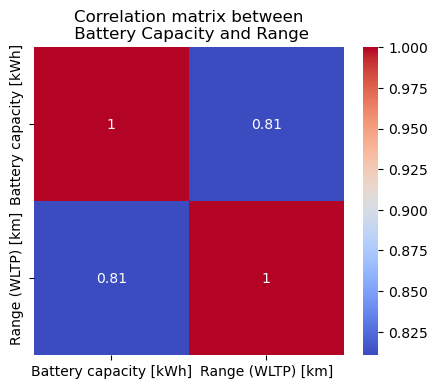

In [41]:
 ## Task 3: Your manager wants to know if there's a strong relationship between battery capacity and range.
 ## a) Create a suitable plot to visualize

relation=df_filled[["Battery capacity [kWh]","Range (WLTP) [km]"]]
plt.figure(figsize=(5,4))
sns.heatmap(relation.corr(),annot=True,cmap="coolwarm") 
plt.title("Correlation matrix between\n Battery Capacity and Range")
plt.show()

 ## b) Highlight any insights
# i ) The value of correlation between"Battery capacity [kWh]" and "Range (WLTP) [km]" is 0.81.
# ii) The correlation value shows a strong positive correlation.
# iii) If we increase the battery capacity, the range will be increased and vice versa,


In [45]:
 ## Task 4: Build an EV recommendation class. The class should allow users to input their
## budget, desired range, and battery capacity. The class should then return the top three EVs matching their criteria

print("1st class - \nBudget - between(82000,260250)  Range- between(148,274.75)   Battery between(17.6,38.2)")
print("2nd class - \nBudget - between(260250,438500) Range- between(274.75,401.5) Battery between(38.2,58.8)")
print("3rd class - \nBudget - between(438500,616750) Range- between(401.5,528.25) Battery between(58.8,79.4)")
print("4th class - \nBudget - between(616750,795000) Range- between(528.25,655)   Battery between(79.4,100.0)")

budget=int(input("Enter your budget"))  ## Allows user to input the budget
Range=float(input("Enter your Range"))  ## Allows user to input the Range
battery=float(input("Enter your battery requirements"))  ## Allows user to input the battery capacity
27
columns_show=["Make","Model","Minimal price (gross) [PLN]","Battery capacity [kWh]","Range (WLTP) [km]"]

## Classification of different classes based on Class Interval formula.

first_class=df_filled[(df_filled["Minimal price (gross) [PLN]"].between(82000,260250)) & (df_filled["Range (WLTP) [km]"].between(148,274.75)) &
(df_filled["Battery capacity [kWh]"].between(17.6,38.2))][columns_show].head(3)   

second_class=df_filled[(df_filled["Minimal price (gross) [PLN]"].between(260250,438500)) & (df_filled["Range (WLTP) [km]"].between(274.75,401.5)) &
(df_filled["Battery capacity [kWh]"].between(38.2,58.8))][columns_show].head(3)

third_class=df_filled[(df_filled["Minimal price (gross) [PLN]"].between(438500,616750)) & (df_filled["Range (WLTP) [km]"].between(401.5,528.25)) &
(df_filled["Battery capacity [kWh]"].between(58.8,79.4))][columns_show].head(3)

fourth_class=df_filled[(df_filled["Minimal price (gross) [PLN]"].between(616750,795000)) & (df_filled["Range (WLTP) [km]"].between(528.25,655)) &
(df_filled["Battery capacity [kWh]"].between(79.4,100.0))][columns_show].head(3)


class recclass:   ## Introducing the class
    def __init__(self,budget,Range,battery):   ## Initiating it with all the variables
        self.budget=budget
        self.Range=Range
        self.battery=battery

    def requirement(self):  ## The method requirement which returns the user EV table based on theri requirements
        
        if 82000 <= self.budget <=260250 and 148 <= self.Range <=274.75 and 17.6 <= self.battery <=38.2:
            return first_class
        elif 260250 <= self.budget <= 438500 and 274.75 <= self.Range <= 401.5 and 38.2 <= self.battery <=58.8:
            return second_class
        elif 438500 <= self.budget <= 616750 and 401.5 <= self.Range <= 528.25 and 58.8 <= self.battery <=79.4:
            return third_class
        elif 616750 <= self.budget <= 795000 and 528.25 <= self.Range <= 655 and 79.4 <= self.battery <= 100.0:
            return fourth_class
        else:
            return "No Matching Found \nEnter correct requirements"

user=recclass(budget,Range,battery)  ## Assigning object user to the class including all the parameters

print(user.requirement())   ## Calling the method with the object.

1st class - 
Budget - between(82000,260250)  Range- between(148,274.75)   Battery between(17.6,38.2)
2nd class - 
Budget - between(260250,438500) Range- between(274.75,401.5) Battery between(38.2,58.8)
3rd class - 
Budget - between(438500,616750) Range- between(401.5,528.25) Battery between(58.8,79.4)
4th class - 
Budget - between(616750,795000) Range- between(528.25,655)   Battery between(79.4,100.0)


Enter your budget 460000
Enter your Range 405
Enter your battery requirements 60


       Make                    Model  Minimal price (gross) [PLN]  \
30  Porsche  Taycan 4S (Performance)                       457000   

    Battery capacity [kWh]  Range (WLTP) [km]  
30                    79.2                407  


In [9]:
 # Task 5: Inferential Statistics– Hypothesis Testing: Test whether there is a significant
 # difference in the average Engine power [KM] of vehicles manufactured by two leading
 # manufacturers i.e. Tesla and Audi. What insights can you draw from the test results?
 # Recommendations and Conclusion: Provide actionable insights based on your analysis.
 # (Conduct a two sample t-test using ttest_ind from scipy.stats module)

Engine_Tesla=df_filled[df_filled["Make"]=="Tesla"]["Engine power [KM]"]  ## Filtering data for Tesla only
Engine_Audi=df_filled[df_filled["Make"]=="Audi"]["Engine power [KM]"]   ## Filtering data for Audi only

t_stat,p_value=stats.ttest_ind(Engine_Tesla,Engine_Audi)  ## Calculating the t_statistics and the p-value

print(f"The average Engine power of Tesla is: {np.mean(Engine_Tesla)}") ## Display the mean of Tesla engine power

print(f"The average Engine power of Audi is: {np.mean(Engine_Audi)}")   #3 Display the mean of Audi Engine power

print(f"The t statistics value is: {t_stat}")

print(f"The P-value is: {p_value}")

if p_value <= 0.05:
    print("\nThere is significant difference between the Engine power of Tesla and Audi")
else:
    print("\n There is no significant difference between the Engine power of Tesla and Audi")

## Findings:
# i) Since the p-value is greater than the significance level (0.05), we fail to reject the null hypothesis.
# ii) This shows that there is no significant difference between the Engine Power of both the Brands.

The average Engine power of Tesla is: 533.0
The average Engine power of Audi is: 392.0
The t statistics value is: 1.7024444538261416
The P-value is: 0.11672692675082785

 There is no significant difference between the Engine power of Tesla and Audi
